<a href="https://colab.research.google.com/github/NonMundaneDev/carbon-arise-internship/blob/main/Arise_Internship_Task_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [ ]:
#read csv file
dataset=pd.read_csv('week3_challenge.csv')

In [ ]:
#columns with null values greater than 30%
null_counts[null_counts > 3597]

score                                     5695
demofeatures_debt_to_income_ratio         8840
demofeatures_payweek                     10916
demofeatures_num_employers               11974
demofeatures_next_of_kin_relationship    11894
demofeatures_avg_household_exp_pm        11980
demofeatures_num_in_household            11974
jazzScore                                 5695
clientKey                                 5695
loanKey                                  11993
loanId                                   11993
utcOffset                                 5695
createdAt                                 5676
obiResult_scorecard                       6171
obiResult_score                           6171
obiResult_riskLevel                       6171
obiResult_ratingClass                     6629
obiResult_ncngav2Id                       6524
dtype: int64

In [ ]:
#drop columns with more than 30% null values
remove=['score', 'demofeatures_debt_to_income_ratio', 'demofeatures_payweek', 'demofeatures_num_employers', 
              'demofeatures_next_of_kin_relationship', 'demofeatures_avg_household_exp_pm', 'demofeatures_num_in_household', 
               'jazzScore', 'clientKey', 'loanKey', 'loanId', 'utcOffset', 'createdAt', 'obiResult_scorecard', 'obiResult_score',
               'obiResult_riskLevel', 'obiResult_ratingClass', 'obiResult_ncngav2Id']
dataset = dataset.drop(columns=remove)
#view data statistics after drop
dataset.describe(include="all")

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId
count,11993.000000,11993.000000,11993,11993,1.199300e+04,1.199300e+04,11993,11993,11993.000000,11993,...,11144.000000,11144.000000,1.114400e+04,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11991.000000,11990
unique,NaN,NaN,2,11993,NaN,NaN,5,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7039
top,NaN,NaN,Client did not meet approval score.,Vthu40acvKAp4lhPwfmaIw_1544196325622,NaN,NaN,credit,True,NaN,NG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f483239b4ba10504278ff0327101c7a4
freq,NaN,NaN,11333,1,NaN,NaN,8400,11993,NaN,11993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
mean,5996.000000,201834.269324,NaN,NaN,4.911094e+08,3.027053e+11,NaN,NaN,1.363796,NaN,...,20.712312,4.353823,2.704500e+04,0.764923,0.746803,92.627782,305.839375,713.127423,38056.376651,NaN
std,3462.225224,40.320754,NaN,NaN,2.894867e+08,3.601095e+08,NaN,NaN,0.933842,NaN,...,91.387687,36.842542,3.278040e+05,0.296635,0.285299,98.067731,605.626409,1305.949015,24196.240819,NaN
min,0.000000,201806.000000,NaN,NaN,8.417000e+03,3.018331e+11,NaN,NaN,1.000000,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,NaN
25%,2998.000000,201809.000000,NaN,NaN,2.353686e+08,3.024286e+11,NaN,NaN,1.000000,NaN,...,0.000000,0.000000,6.294000e+03,0.745305,0.731833,48.000000,108.000000,266.000000,22374.775040,NaN
50%,5996.000000,201812.000000,NaN,NaN,4.834831e+08,3.028665e+11,NaN,NaN,1.000000,NaN,...,0.000000,0.000000,1.014450e+04,0.883366,0.856220,64.000000,141.000000,329.000000,32267.467786,NaN
75%,8994.000000,201901.000000,NaN,NaN,7.462408e+08,3.029956e+11,NaN,NaN,1.000000,NaN,...,0.000000,0.000000,2.136075e+04,0.948669,0.917775,99.000000,266.000000,627.000000,46514.401003,NaN


In [ ]:
#view data after drop
dataset.head()

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId
0,0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,...,0.0,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360
1,1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,...,0.0,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c
2,2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,...,0.0,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc
3,3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,...,50.0,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18
4,4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,...,0.0,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7


In [ ]:
#select numeric columns
numeric=dataset.select_dtypes(include='number').columns
print(numeric)

Index(['Unnamed: 0', 'createdAt_Month', 'SystemCustomerID', 'SystemLoanID',
       'next_loan_number', 'Income', '__v', 'demofeatures_net_income_band',
       'demofeatures_appweek', 'demofeatures_age_at_application_yrs',
       ...
       'callFeatures_vol_calls_1_mnth_out',
       'callFeatures_vol_calls_2_mnth_out',
       'callFeatures_vol_calls_3_mnth_out', 'callFeatures_dur_calls_out',
       'callFeatures_dur_calls_contacts_out',
       'callFeatures_ratio_contacts_out',
       'callFeatures_no_distinct_call_numbers_out',
       'callFeatures_no_calls_over_zero_secs_out', 'callFeatures_no_calls_out',
       'predictedIncome'],
      dtype='object', length=249)


In [ ]:
#create new dataframe for numeric columns
numericdf = dataset[numeric].copy()
numericdf.head()

,Unnamed: 0,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,...,callFeatures_vol_calls_1_mnth_out,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome
0,0,201812,334043596,302881418623,1,200000.0,0.0,200000.0,1.0,28.0,...,655.0,0.0,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499
1,1,201809,524284563,302328949395,4,80000.0,0.0,100000.0,1.0,33.0,...,2923.0,0.0,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891
2,2,201810,481582700,302536536368,2,39500.0,0.0,50000.0,2.0,26.0,...,1115.0,0.0,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277
3,3,201812,234330495,302887567434,1,50000.0,0.0,50000.0,1.0,36.0,...,58.0,50.0,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832
4,4,201901,563455515,303057983993,2,20000.0,0.0,75000.0,3.0,28.0,...,1474.0,0.0,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467


In [ ]:
#replace null values in the numeric dataframe with 0
nonulldf=numericdf.replace(np.nan, 0)
print(nonulldf)

       Unnamed: 0  createdAt_Month  SystemCustomerID  SystemLoanID  \
0               0           201812         334043596  302881418623   
1               1           201809         524284563  302328949395   
2               2           201810         481582700  302536536368   
3               3           201812         234330495  302887567434   
4               4           201901         563455515  303057983993   
5               5           201808         134463080  302290263403   
6               6           201901         175329358  303026903239   
7               7           201901          64798462  303060959919   
8               8           201806         733859346  301841144447   
9               9           201812         400889417  302944010492   
10             10           201901         440928616  303091203257   
11             11           201901         304303767  303027601807   
12             12           201812         374247943  302946796035   
13             13   

In [ ]:
#scale the no null numeric dataframe
scaledset= StandardScaler().fit_transform(nonulldf)

In [ ]:
#pca reduction
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaledset)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'
                                                                  ,'principal component 3', 'principal component 4'
                                                                  ,'principal component 5'])

In [ ]:
#pca dataframe
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.279458,-2.271280,0.754030,-1.592924,4.260109
1,13.517623,-3.686488,-2.144360,-0.886419,-0.205139
2,5.958359,-2.369066,0.090145,0.489787,0.273763
3,-1.822008,1.369438,-0.224442,3.310222,0.327361
4,2.691006,1.781517,0.573268,-2.890831,-0.830729


In [ ]:
#variance of the components
variance = np.var(principalDf)
variance

principal component 1    86.468826
principal component 2    22.906048
principal component 3     9.314897
principal component 4     8.219662
principal component 5     6.728053
dtype: float64

In [ ]:
#total variance of all components
variance.sum()

133.6374849362153

In [ ]:
#Kmeans with 3 clusters
model = KMeans(n_clusters=3)
model.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
#clusters
clusters = model.predict(principalDf)
print(list(clusters))

[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 

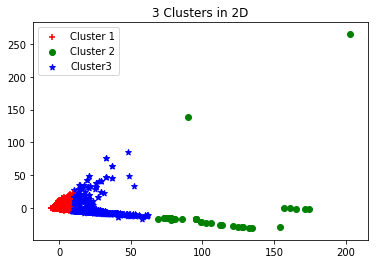

In [ ]:
#kmeans cluster plot
for i in range(len(clusters)):
    if clusters[i] == 0:
        c1 = plt.scatter(principalDf.iloc[i, 0], principalDf.iloc[i, 1], c='r', marker='+')
    elif clusters[i] == 1:
        c2 = plt.scatter(principalDf.iloc[i, 0], principalDf.iloc[i, 1], c='g', marker='o')
    elif clusters[i] == 2:
        c3 = plt.scatter(principalDf.iloc[i, 0], principalDf.iloc[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster3'])
plt.title('3 Clusters in 2D')
plt.show()

In [ ]:
principalDf['Cluster']=clusters
principalDf['Cluster'].unique()
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Cluster
0,4.279458,-2.271280,0.754030,-1.592924,4.260109,0
1,13.517623,-3.686488,-2.144360,-0.886419,-0.205139,2
2,5.958359,-2.369066,0.090145,0.489787,0.273763,0
3,-1.822008,1.369438,-0.224442,3.310222,0.327361,0
4,2.691006,1.781517,0.573268,-2.890831,-0.830729,0


In [ ]:
principalDf.groupby(['Cluster']).mean()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
Cluster,,,,,
0,-1.887974,0.030634,-0.018219,0.036074,0.005089
1,110.750922,-5.635058,-4.893786,0.652341,0.548196
2,19.550859,-0.157869,0.436246,-0.488522,-0.087852
